# Monte Carlo Risk Engine

## Motivation

At first, I wanted to mess around with Monte Carlo simulations of **two-asset portfolios where the assets are negatively correlated**. However, while maintaining the strucutre of the two-assset portfolio simulaiton, I gradually pivoted towards **simulating returns according to varying distributions**. 

Most examples I found online only considered a Mean-Variance framework where returns are normally distributed and multi-asset returns are modeled with a multivariate normal. Because most return distributions are actually skewed in reality, **I wanted to explore this asymmetry**.

## Data

I collected and preprocessed price data from yfinance. Using the Adjusted Close price data, I calculated the following parameters that would serve as the basis for the simulations:


- Log Returns (all further parameters and statistics are thus calculated in log space)
- Mean
- Variance
- Skew
- Covariance Matrix (for correlation)
- Kendall's Tau (for rank correlation)

## Methodology

For this project, I created a Python Class capable of generating portfolio simulations of up to two assets. Furthermore, there are four types of simulations that can be generated, each one corresponding to a different probability distribution.

1) Normal 
2) Skew-Normal 
3) Student-t
4) Skew-t

The Normal model was by far the easiest to implement since Numpy has a built in multivariate normal function. Student-t does the same but is also scaled by a chi-square random variable.

For both skewed distributions, I utilized built-in functions from Scipy.stats and implemented a Gaussian copula for skew-normal and t-copula for skew-t respectively in order to model cross-asset dependence. 

For every simulation, the following risk/return metrics can be calculated and visualized:

- Terminal Wealth
- Value at Risk (VaR)
- Conditional Tail Expectation (CTE)
- Max Drawdown

## Results

Below is an example of eight simulations. It comprises of two portfolios (60/40 SPY, TLT and 100% SPY) with four simulations each. An individual simulation is modeled according to one of four return distributions: Normal, Student-t, Skew-Normal, and Skew-t. In each row, the left-most plot is the Monte Carlo simulation over a fixed period of time with monthly rebalancing. The center plot is a distribution of the final values of the portfolio simulations and to the right is a distribution of max drawdowns. 

At the top, the followign metrics are displayed: 
1) VaR (Value at Risk)
2) CTE (Conditional Tail Expectation)
3) Median Wealth
4) Median Max Drawdown
5) Worst Max Drawdown

/opt/anaconda3/lib/python3.11/site-packages/yfinance/scrapers/history.py:204: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  2 of 2 completed


Value at Risk (95% VaR): 6.32%
Conditional Tail Expectation (95% CTE): 8.66%
Median Wealth: $10430.82
Median Max Drawdown: 5.11%
Worst Max Drawdown: 18.39%


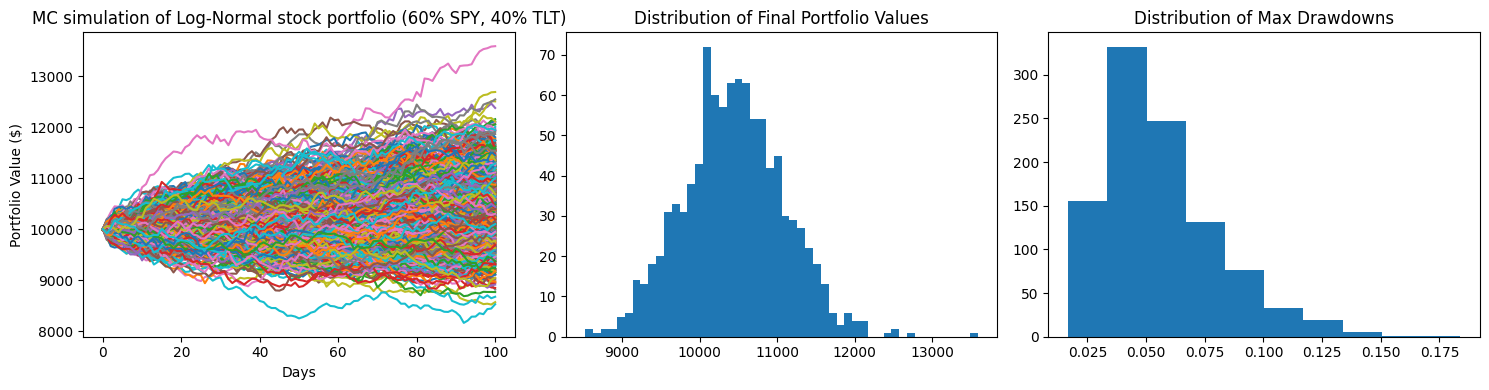

Value at Risk (95% VaR): 7.17%
Conditional Tail Expectation (95% CTE): 9.43%
Median Wealth: $10372.05
Median Max Drawdown: 5.5%
Worst Max Drawdown: 16.91%


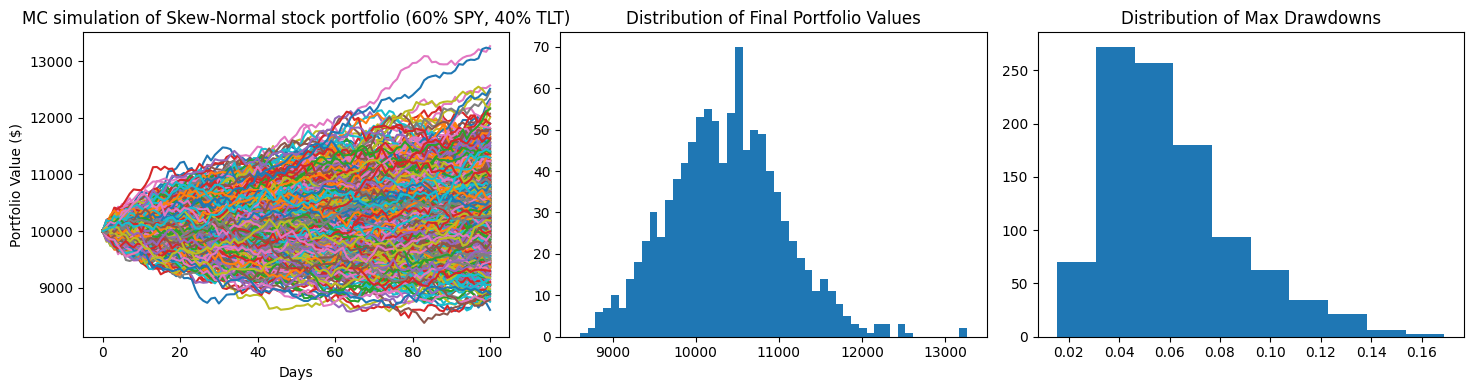

Value at Risk (95% VaR): 6.48%
Conditional Tail Expectation (95% CTE): 8.49%
Median Wealth: $10362.97
Median Max Drawdown: 5.28%
Worst Max Drawdown: 15.85%


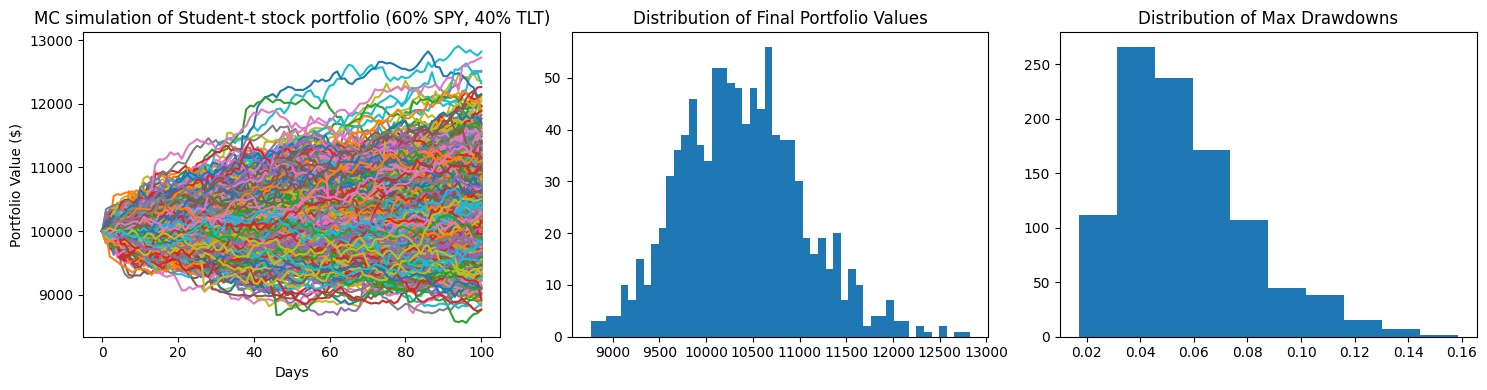

Value at Risk (95% VaR): 9.67%
Conditional Tail Expectation (95% CTE): 14.04%
Median Wealth: $10296.71
Median Max Drawdown: 6.28%
Worst Max Drawdown: 45.62%


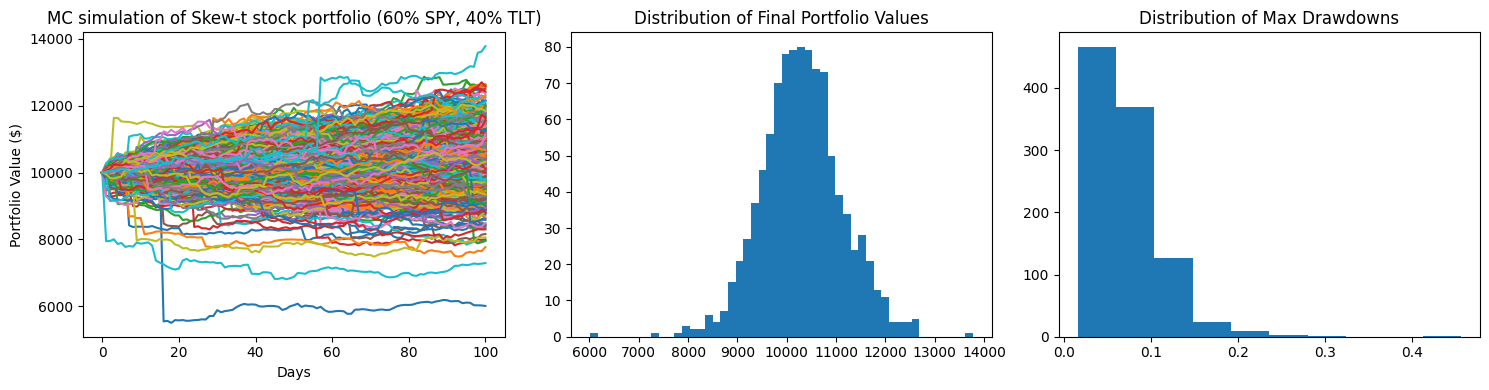

/opt/anaconda3/lib/python3.11/site-packages/yfinance/scrapers/history.py:204: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed


Value at Risk (95% VaR): 12.63%
Conditional Tail Expectation (95% CTE): 17.2%
Median Wealth: $10521.3
Median Max Drawdown: 9.12%
Worst Max Drawdown: 32.7%


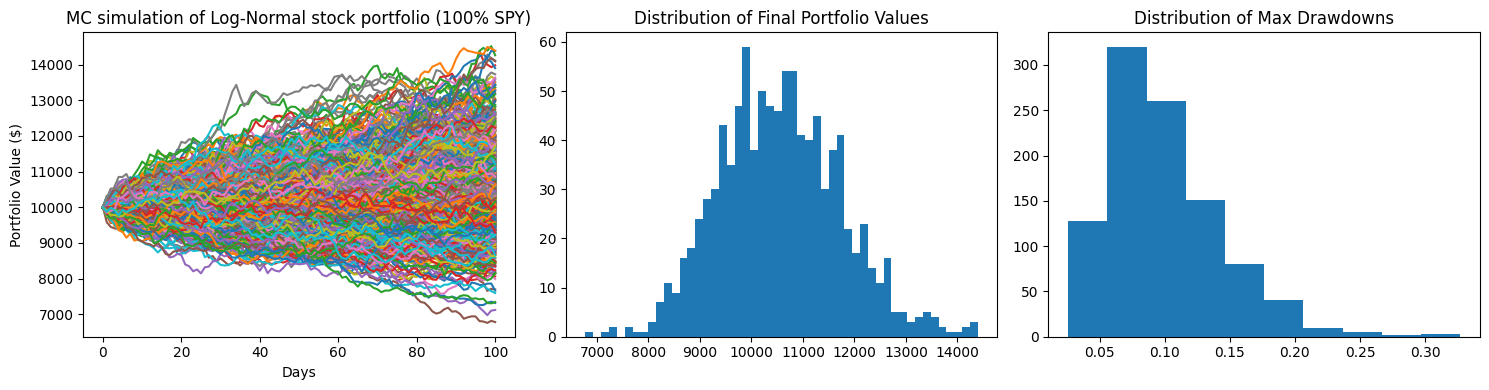

/opt/anaconda3/lib/python3.11/site-packages/yfinance/scrapers/history.py:204: Pandas4Warning: Timestamp.utcnow is deprecated and will be removed in a future version. Use Timestamp.now('UTC') instead.
  dt_now = pd.Timestamp.utcnow()
[*********************100%***********************]  1 of 1 completed


Value at Risk (95% VaR): 12.93%
Conditional Tail Expectation (95% CTE): 16.7%
Median Wealth: $10396.54
Median Max Drawdown: 9.14%
Worst Max Drawdown: 32.25%


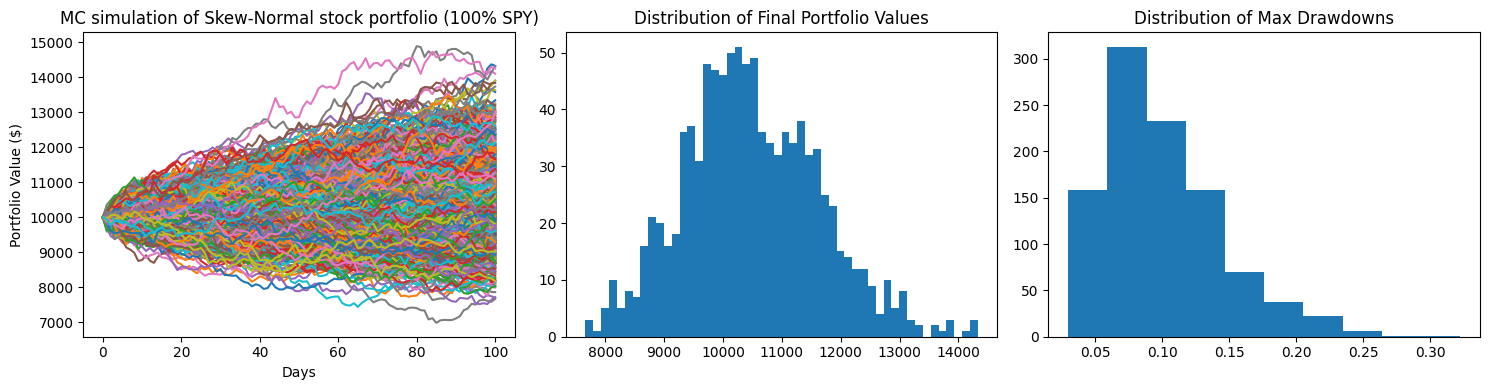

Value at Risk (95% VaR): 11.82%
Conditional Tail Expectation (95% CTE): 15.34%
Median Wealth: $10450.99
Median Max Drawdown: 9.05%
Worst Max Drawdown: 28.19%


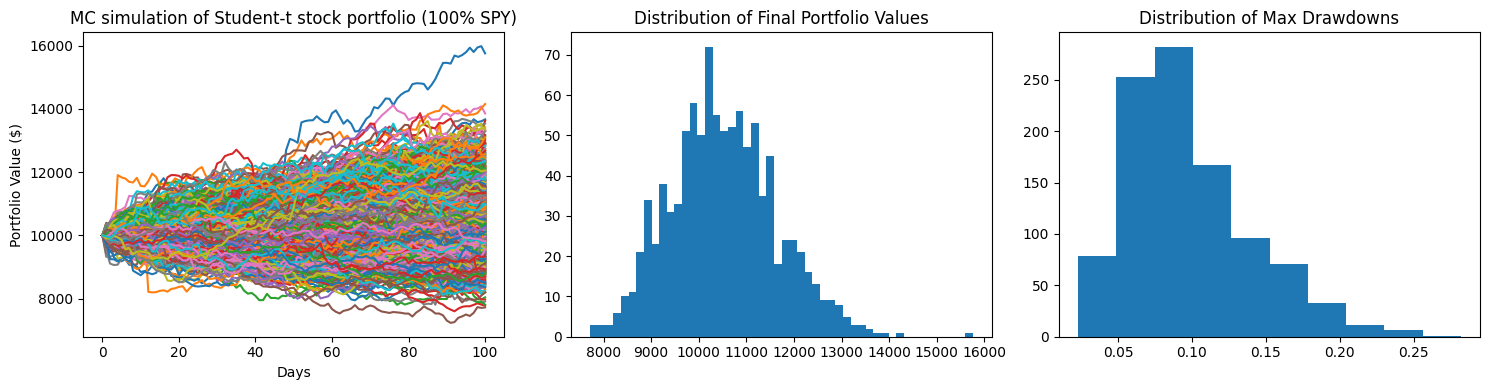

Value at Risk (95% VaR): 15.9%
Conditional Tail Expectation (95% CTE): 21.44%
Median Wealth: $10410.34
Median Max Drawdown: 9.32%
Worst Max Drawdown: 49.17%


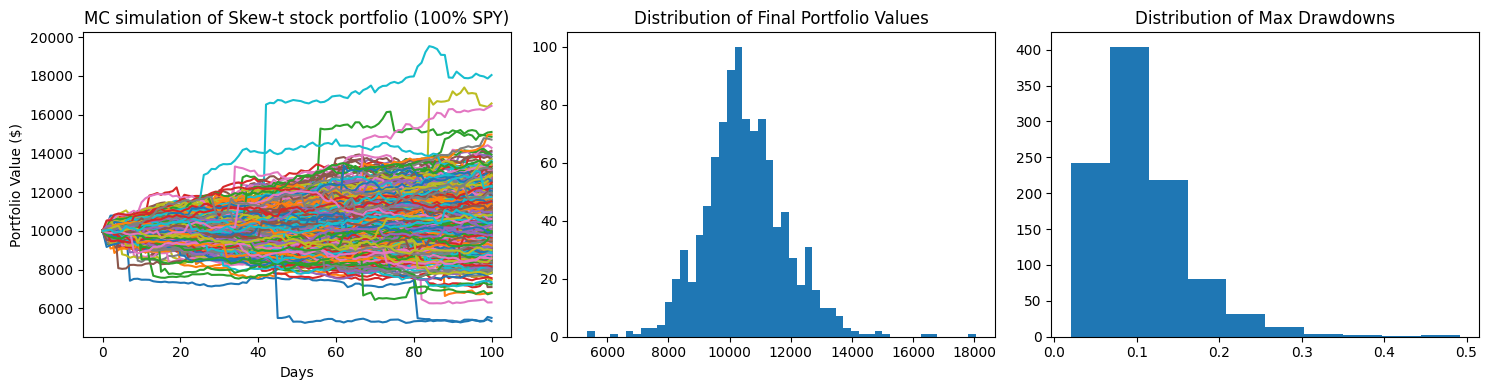

In [10]:
import MonteCarloEngine

## Takeaways & Next Steps

I had three main takeaways from this project:

1) The assumption of normal behavior in market and equity returns creates flawed models that don't fully capture the reality of tail risk. However, through doing this project, I understand WHY assuming normality is so common. It makes algorithms and calculations much easier to design, expand, and interpret. It took me significantly less time and effort to figure out how to implement the LogNormal simulations than any other one because there frankly aren't that many steps.

2) Simulating non-normal portfolio returns didn't turn out to be an exact science, but was pretty close. While I was able to learn and utilize mathemaical techniques like Gaussian and t-copulas to create realistic models, there was still some parts where I decided to input fixed parameters like degrees of freedom because calculating it manually based on the data would have required separate long complex scripts, and I found that there was established 'reasonable' range of values I could choose from.

3) There are so many tools and techniques to learn and use to build on this project. For example, dynamic volatility through GARCH modeling can add another layer of insight since markets and their  volatility tend to move through regimes. 